In [22]:
import os, csv

In [23]:
with open('titanic.csv','r') as infile:
    reader = csv.reader(infile)
    dane = list(reader)

In [24]:
l = len(dane) # Teoretycznie wszystko się zgadza, lecz pierwszy wiersz jest opisem kolumn, czyli mamy jednego mniej pasażera.
print(l)

892


In [25]:
for j in dane[:]: 
    print(j)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q']
['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S']
['9', '1', '3', 'Johnson, Mrs. Oscar W (Elis

In [26]:
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

In [27]:
def funkcja(x): 
    lo = 0 # liczba ocalałych
    lom = 0 # liczba ocalałych mężczyzn
    lok = 0 # liczba ocalałych kobiet
    ln = 0 # liczba nieocalałych
    lnm = 0 # liczba nieocalałych mężczyzn
    lnk = 0 # liczba nieocalałych kobiet
    po = 0 # procent ocalałych
    pom = 0 # procent ocalałych mężczyzn
    pok = 0 # procent ocalałych kobiet
    pn = 0 # procent nieocalałych
    pnm = 0 # procent nieocalałych mężczyzn
    pnk = 0 # procent nieocalałych kobiet
    lm = 0 # liczba mężczyzn
    lk = 0 # liczba kobiet
    l = len(x)
    for j in range(l):
        if x[j][4] == 'male':
            lm = lm+1
    for j in range(l):        
        if x[j][4] == 'female':
            lk = lk+1
    for j in range(l):        
        if x[j][1] == '1':
            lo = lo+1
            po = round(100*lo/(l-1),2)
    for j in range(l):        
        if x[j][1] == '1' and dane[j][4] == 'male':
            lom = lom+1
            pom = round(100*lom/lm,2)
    for j in range(l):
        if x[j][1] == '1' and dane[j][4] == 'female':
            lok = lok+1
            pok = round(100*lok/lk,2)
    
    
    print('Ocalało',po,'procent pasażerów\n\t',pom,'procent mężczyzn\n\t',pok,'procent kobiet')
  
    
    
        

In [28]:
funkcja(dane)

Ocalało 38.38 procent pasażerów
	 18.89 procent mężczyzn
	 74.2 procent kobiet


In [29]:
def słownik(x):
    l = len(x)
    lo = 0 # liczba ocalałych
    ln = 0 # liczba nieocalałych
    n = 0 # nieznany
    for j in range(l):
        if x[j][1] == '0':
            ln = ln+1
        elif x[j][1] == '1':
            lo = lo+1
        else:
            n = n+1 
    q = {'ocalali': lo, 'nieocalali': ln, 'nieznany': n}
    return q

In [30]:
słownik(dane)

{'ocalali': 342, 'nieocalali': 549, 'nieznany': 1}

In [31]:
def średniwiek(x):
    l = len(x)
    lm = 0 # liczba mężczyzn 
    slm = 0 # suma lat mężczyzn 
    lk = 0 # liczba kobiet 
    slk = 0 # suma lat kobiet
    lw = 0 # liczba wszystkich pasażerów 
    slw = 0 # suma lat wszystkich pasażerów
    for j in range(l):
        if x[j][4] == 'male':
            try:
                lm = lm+1
                slm = slm + float(x[j][5])
            except ValueError: 
                pass
        if x[j][4] == 'female':
            try:
                lk = lk+1
                slk = slk + float(x[j][5])
            except ValueError:
                pass
    lw = lk+lm
    slw = slk+slm
    śm = slm/lm
    śk = slk/lk
    św = slw/lw
    return śm, śk, św # dotyczy tych pasażerów, którzy mieli podany wiek!!

In [32]:
średniwiek(dane)

(24.123344887348352, 23.203821656050955, 23.79929292929293)

In [33]:
def histogram(x):
    l = len(x)
    lm = 0 # liczba mężczyzn 
    wm = [] # wiek mężczyzn 
    lk = 0 # liczba kobiet 
    wk = [] # wiek kobiet 
    lw = 0 # liczba wszystkich pasażerów
    ww = [] # wiek wszystkich pasażerów 
    for j in range(l):
        if x[j][4] == 'male':
            try:
                lm = lm+1
                wm.append(float(x[j][5]))
            except ValueError:
                pass
        if x[j][4] == 'female':
            try:
                lk = lk+1
                wk.append(float(x[j][5]))
            except ValueError:
                pass
    lw = lk+lm
    ww = wk+wm
    twm = np.array(wm) # tablica z wiekiem mężczyzn
    twk = np.array(wk) # tablica z wiekiem kobiet
    tww = np.array(ww) # tablica z wiekiem wszystkich pasażerów
    
    hm = mpl.hist(wm, facecolor='tab:red')
    mpl.xlabel('Wiek')
    mpl.ylabel('Liczba mężczyzn')
    mpl.title('Histogram dotyczący wieku mężczyzn')
    mpl.grid(False)
    mpl.show(hm)
        
    hk = mpl.hist(wk, facecolor='tab:blue')
    mpl.xlabel('Wiek')
    mpl.ylabel('Liczba kobiet')
    mpl.title('Histogram dotyczący wieku kobiet')
    mpl.grid(False)
    mpl.show(hk)
    
    hw = mpl.hist(ww, facecolor='tab:green')
    mpl.xlabel('Wiek')
    mpl.ylabel('Liczba pasażerów')
    mpl.title('Histogram dotyczący wieku pasażerów')
    mpl.grid(False)
    mpl.show(hw)
    

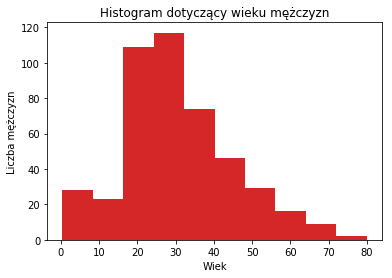

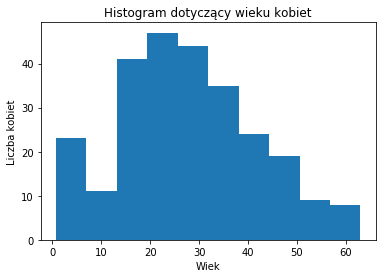

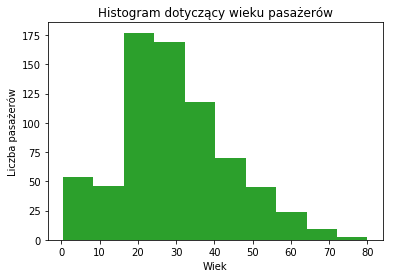

In [34]:
histogram(dane)

In [35]:
def surnames(x):
    l = len(x)
    
    linm = [] # lista imion i nazwisk mężczyzn
    for j in range(l):
        if x[j][4] == 'male':
            linm.append(x[j][3])
    lm = len(linm) # liczba mężczyzn
    lnm = [] # lista nazwisk mężczyzn
    for j in range(lm):
        k = 0
        while linm[j][k] != ',':
            k += 1
        lnm.append(linm[j][:k])
    lnm.sort()
    max1 = 0 # największa ilość powtarzających się nazwisk mężczyzn
    for j in range(lm):
        if lnm.count(lnm[j]) > max1:
            max1 = lnm.count(lnm[j])
    nnm = [] # najczęstsze nazwiska mężczyzn
    while len(nnm) < 4:
        for j in range(lm):
            if lnm.count(lnm[j]) == max1 and nnm.count(lnm[j]) == 0: # drugi warunek jest po to, żeby nie zapisywać tego samego nazwiska drugi raz
                nnm.append(lnm[j])
        max1 -= 1
    while len(nnm) > 3:
        nnm.pop(len(nnm)-1) # usuwa zbyt dużą ilość nazwisk gdy są takie same
        
    link = [] # lista imion i nazwisk kobiet
    for j in range(l):
        if x[j][4] == 'female':
            link.append(x[j][3])
    lk = len(link) # liczba kobiet
    lnk = [] # lista  nazwisk kobiet
    for j in range(lk):
        k = 0
        while link[j][k] != ',':
            k += 1
        lnk.append(link[j][:k])
    lnk.sort()
    max2 = 0 # największa ilość powtarzających się nazwisk kobiet
    for j in range(lk):
        if lnk.count(lnk[j]) > max2:
            max2 = lnk.count(lnk[j])
    nnk = [] # najczęstsze nazwiska kobiet
    while len(nnk) < 4:
        for j in range(lk):
            if lnk.count(lnk[j]) == max2 and nnk.count(lnk[j]) == 0:
                nnk.append(lnk[j])
        max2 -= 1
    while len(nnk) > 3:
        nnk.pop(len(nnk)-1) 
        
    return nnm, nnk
    # ffunkcja zwraca listę trzech najczęściej występujących nazwisk mężczyzn i kobiet w takiej kolejności jak jest napisane

In [36]:
surnames(dane)

(['Panula', 'Goodwin', 'Gustafsson'], ['Andersson', 'Baclini', 'Brown'])

In [37]:
def classes(x):
    man1 = 0
    man2 = 0
    man3 = 0
    woman1 = 0
    woman2 = 0
    woman3 = 0
    numman1 = [] #liczba mezczyzn w pierwszej klasie w postaci listy
    numman2 = [] #liczba mezczyzn w drugiej klasie w postaci listy
    numman3 = [] #liczba mezczyzn w trzeciej klasie w postaci listy
    numwoman1 = [] #liczba kobiet w pierwszej klasie w postaci listy
    numwoman2 = [] #liczba kobiet w drugiej klasie w postaci listy
    numwoman3 = []#liczba kobiet w trzeciej klasie w postaci listy
    l = len(x)
    for j in range(l):
        if x[j][2]=='1' and x[j][4]=='male':
            man1 += 1
            numman1.append(1) #liczba mezczyzn w pierwszej klasie pokazana na pierwszym słupku, dalej analogicznie
    for j in range(l):
        if x[j][2]=='2' and x[j][4]=='male':
            man2 += 1
            numman2.append(3)
    for j in range(l):
        if x[j][2]=='3' and x[j][4]=='male':
            man3 += 1
            numman3.append(5)
    for j in range(l):
        if x[j][2]=='1' and x[j][4]=='female':
            woman1 += 1
            numwoman1.append(2)
    for j in range(l):
        if x[j][2]=='2' and x[j][4]=='female':
            woman2 += 1
            numwoman2.append(4)
    for j in range(l):
        if x[j][2]=='3' and x[j][4]=='female':
            woman3 += 1
            numwoman3.append(6)
    numman = numman1 + numman2 + numman3
    numwoman = numwoman1 + numwoman2 + numwoman3
    
    tm = np.array(numman) # tablica z liczba mezczyzn
    tk = np.array(numwoman) # tablica z liczba kobiet
    
    tm = mpl.hist(tm)
    tk = mpl.hist(tk)
    return tm, tk

((array([122.,   0.,   0.,   0.,   0., 108.,   0.,   0.,   0., 347.]),
  array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
  <a list of 10 Patch objects>),
 (array([ 94.,   0.,   0.,   0.,   0.,  76.,   0.,   0.,   0., 144.]),
  array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
  <a list of 10 Patch objects>))

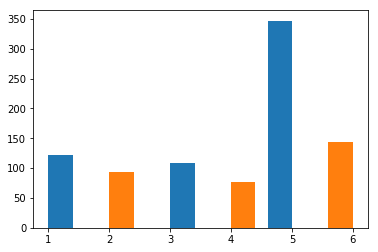

In [38]:
classes(dane)